In [2]:
#original notebook for training. Last run 2025_06_26. will need to update paths to run again.

In [3]:
#confirm that Python 3.10 is running
!which python
!python --version

/Users/bruceantley/anaconda3/envs/fastai310/bin/python
Python 3.10.18


In [7]:
pip install charset_normalizer

Note: you may need to restart the kernel to use updated packages.


In [8]:
from fastai.vision.all import *

In [9]:
# Set dataset path
path = Path('/Users/bruceantley/Documents/face_classifier_310/train_sets/2025_06_26_dataset')

# Define transforms
item_tfms = Resize(299)

batch_tfms = aug_transforms(
    do_flip=True,
    flip_vert=False,
    max_rotate=20.0,     # increased rotation
    max_zoom=1.2,        # increased zoom
    max_lighting=0.4,    # stronger lighting changes
    max_warp=0.2
) + [Normalize.from_stats(*imagenet_stats)]  # add normalization

In [10]:
# Load data with transforms
dls = ImageDataLoaders.from_folder(
    path,
    valid_pct=0.2,
    seed=42,
    item_tfms=item_tfms,
    batch_tfms=batch_tfms,
    bs=8
)

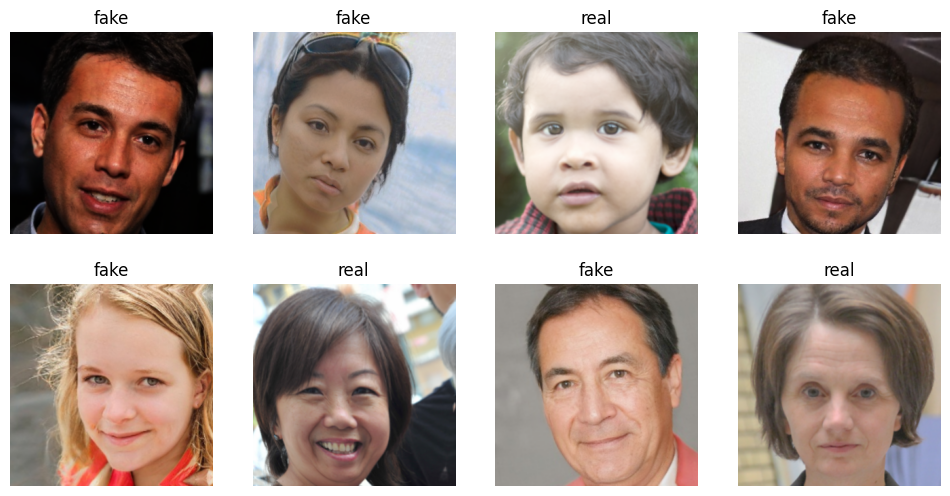

In [11]:
# Visualize a batch
dls.show_batch(max_n=9)

In [12]:
from fastai.vision.all import *

learn = vision_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.352450,0.167188,0.943128,02:39


epoch,train_loss,valid_loss,accuracy,time
0,0.232899,0.151561,0.952607,02:59
1,0.172752,0.114841,0.963665,02:59
2,0.147583,0.111217,0.962085,03:00
3,0.133430,0.211968,0.958136,03:21
4,0.167962,0.104724,0.967615,02:58
5,0.111473,0.044898,0.985782,03:00
6,0.082265,0.058470,0.981833,02:59
7,0.059092,0.030060,0.989731,03:00
8,0.050813,0.032036,0.990521,03:00
9,0.034784,0.025824,0.990521,02:59


In [16]:
learn.export("/Users/bruceantley/Documents/face_classifier_310/model_exports/round0_final.pkl")

In [8]:
# Predict on a new image
img = PILImage.create('/Users/bruceantley/Documents/Test Images/IMG_6048.jpg')  # replace with an actual file
pred, pred_idx, probs = learn.predict(img)
print(f"Prediction: {pred}; Probability: {probs[pred_idx]:.04f}")

Prediction: real; Probability: 0.9989


In [14]:
# Predict on a new image
img = PILImage.create('/Users/bruceantley/Desktop/Screenshot 2025-07-06 at 3.38.45 PM.png')  # replace with an actual file
pred, pred_idx, probs = learn.predict(img)
print(f"Prediction: {pred}; Probability: {probs[pred_idx]:.04f}")

Prediction: real; Probability: 0.9938


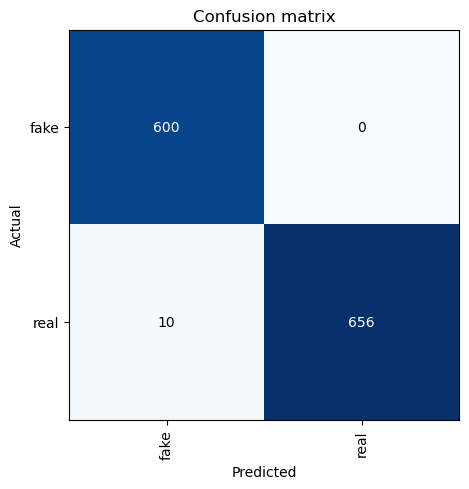

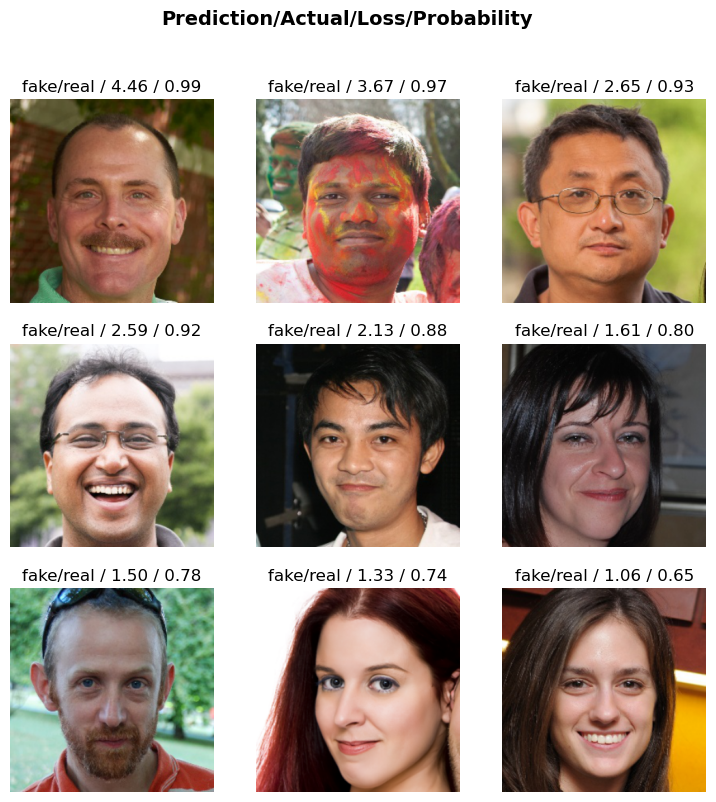

In [7]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(9)